In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from quantumnetworks import SingleModeSystem, plot_full_evolution, animate_evolution, DoubleModeSystem, MultiModeSystem, plot_evolution_phase_space,plot_full_evolution_phase_space
import numpy as np

## Single mode system with far detuned drive

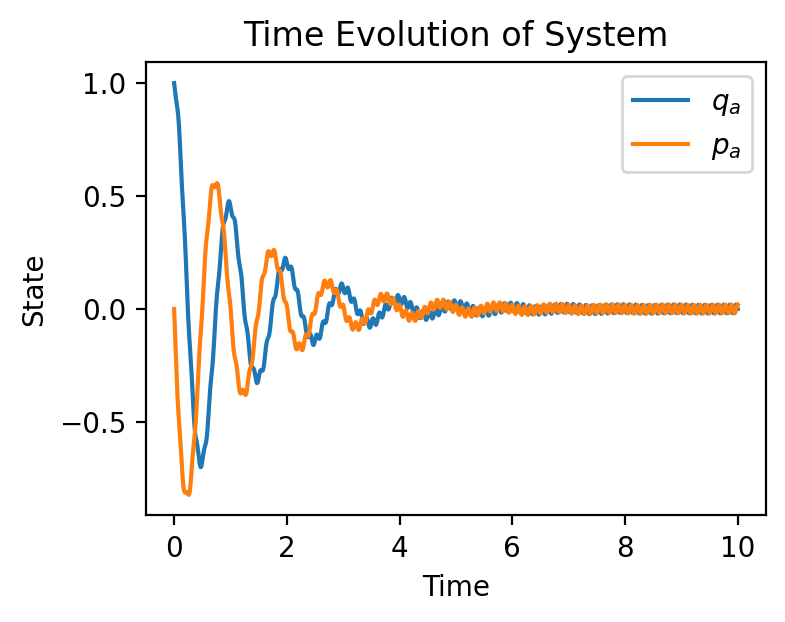

In [275]:
# Single mode system with detuned drive
omega_a = 2*np.pi*1
delta = 2*np.pi*8
A_in = lambda t: np.exp(1j*(omega_a +delta)*t)
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 2*np.pi*0.25}, A_in = A_in)
x_0 = np.array([1,0])
ts = np.linspace(0, 10, 1001)
X = sys.trapezoidal(x_0, ts)
X[1,:] = X[1,:] 
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()
# ax.set_ylim(-0.18,0.18)

(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='q', ylabel='p'>)

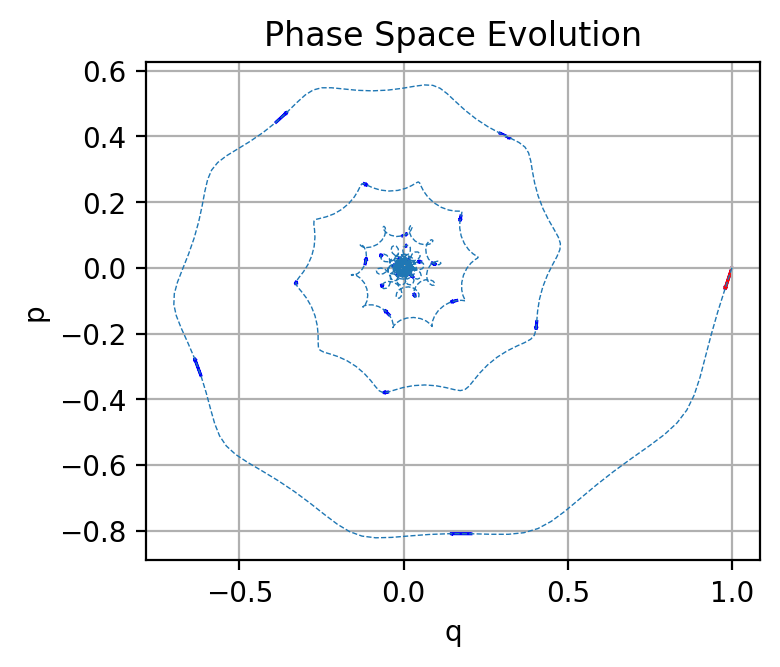

In [276]:
plot_evolution_phase_space(X)

## 3 Mode System

In [96]:
omegas = [2*np.pi*1,2*np.pi*2,2*np.pi*3]
kappas = [2*np.pi*0.001,2*np.pi*0.001,2*np.pi*0.001]
gammas = np.zeros(3)
kerrs = np.zeros(3)

couplings = [[0,1,2*np.pi*0.5],[1,2,2*np.pi*0.5]]

# drive each mode on resonance
# periodic_drive_gen = lambda w, t: np.exp(1j*w*t) 
# drives = {0:lambda t: periodic_drive_gen(omegas[0], t), 1:lambda t: periodic_drive_gen(omegas[1], t), 2:lambda t: periodic_drive_gen(omegas[2], t)}

# drive only one mode on resonance
periodic_drive_gen = lambda w, t: np.exp(1j*w*t) 
drives = {0:lambda t: periodic_drive_gen(2*np.pi*1, t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0, 0,0, 0,0])
ts = np.linspace(0, 20, 1001)
X = sys.trapezoidal(x_0, ts)

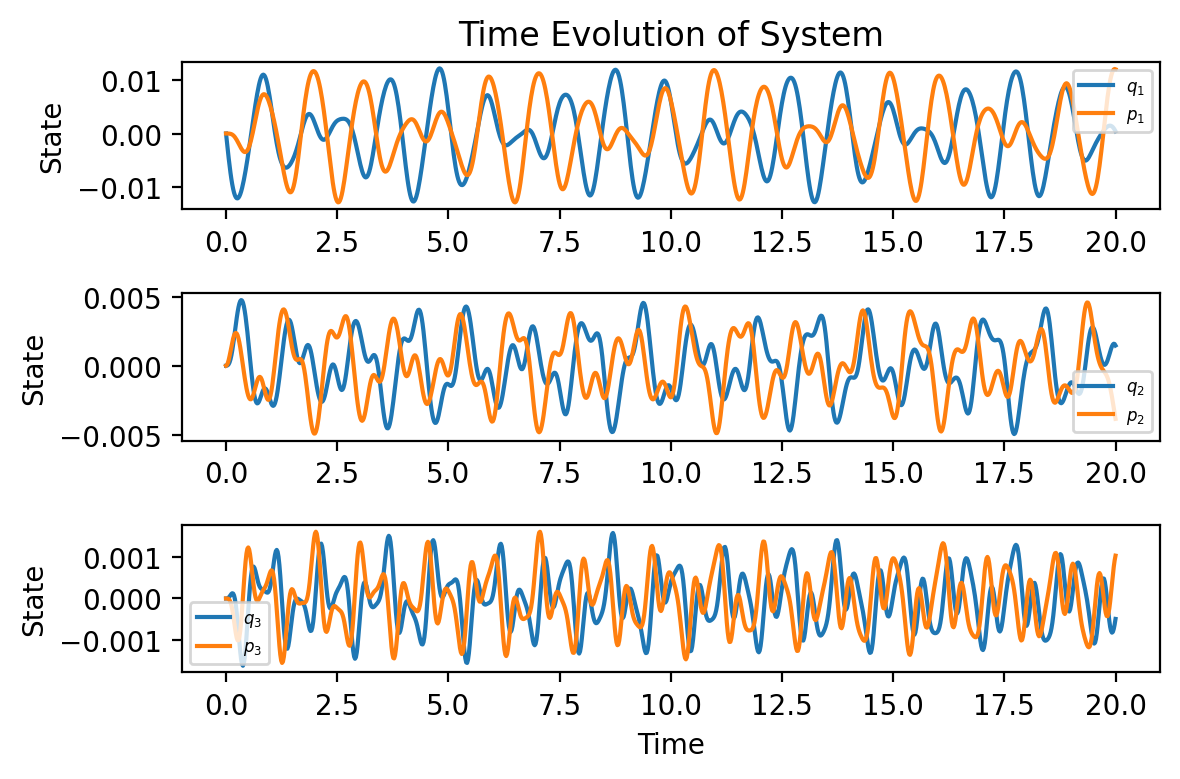

In [97]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,1, dpi=200)

# ylim = [-0.15,0.15]
i = 0
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[:2], ts, fig=fig, ax=ax, labels=labels)
ax.legend(fontsize=6)
# ax.set_title(None)
ax.set_xlabel(None)
# ax.set_ylim(*ylim)

i = 1
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[2:4], ts, fig=fig, ax=ax,labels=labels)
ax.legend(fontsize=6)
ax.set_title(None)
ax.set_xlabel(None)
# ax.set_ylim(*ylim)

i = 2
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[4:6], ts, fig=fig, ax=ax,labels=labels)
ax.legend(fontsize=6)
ax.set_title(None)
# ax.set_ylim(*ylim)


fig.tight_layout()

To test:
* Set up single mode and scan drive frequency through resonance
* Test simple system whose normal modes we know, e.g. 2x2 and see if output of second mode is high on resonance with normal mode
* Check coupling capacitances in Houck paper

## 2 Mode System with known eigenmodes
* Eigenvalues are wr+g and wr-g with eigenvectors (1,1) and (1,-1)
* Compare phase space diagrams for eigenmode drives and arbitrary drives

In [262]:
wr = 1
g = 0.5
omegas = [2*np.pi*wr,2*np.pi*wr]
kappas = [2*np.pi*0.1,2*np.pi*0.1]
gammas = np.zeros(2)
kerrs = np.zeros(2)

couplings = [[0,1,2*np.pi*g]]

# drive eigenmodes
periodic_drive_gen = lambda w, t: np.exp(1j*w*t)
drives_eig1 = {0:lambda t: 1 * periodic_drive_gen(2*np.pi*(wr+g), t),
          1:lambda t: 1 * periodic_drive_gen(2*np.pi*(wr+g), t)}
drives_eig2 = {0:lambda t: 1 * periodic_drive_gen(2*np.pi*(wr-g), t),
          1:lambda t: -1 * periodic_drive_gen(2*np.pi*(wr-g), t)}

# drive NOT eigenmodes
drives = {0:lambda t: 1 * periodic_drive_gen(2*np.pi*(wr), t),
          1:lambda t: 2 * periodic_drive_gen(2*np.pi*(wr), t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0, 0,0])
ts = np.linspace(0, 20, 1001)
X = sys.trapezoidal(x_0, ts)

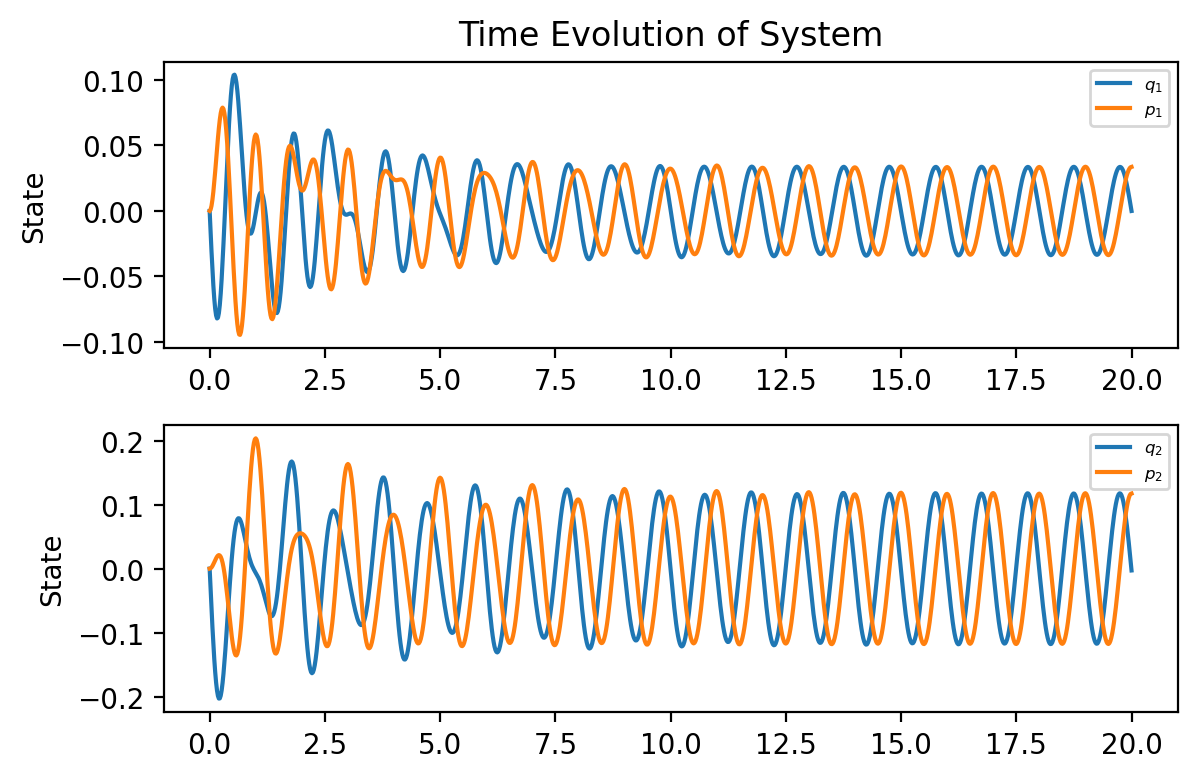

In [263]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1, dpi=200)

i = 0
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[:2], ts, fig=fig, ax=ax, labels=labels)
ax.legend(fontsize=6)
# ax.set_title(None)
ax.set_xlabel(None)
# ax.set_ylim(*ylim)

i = 1
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[2:4], ts, fig=fig, ax=ax,labels=labels)
ax.legend(fontsize=6)
ax.set_title(None)
ax.set_xlabel(None)
# ax.set_ylim(*ylim)

fig.tight_layout()

(<Figure size 1600x800 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_1$', ylabel='$p_1$'>,
        <AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_2$', ylabel='$p_2$'>],
       dtype=object))

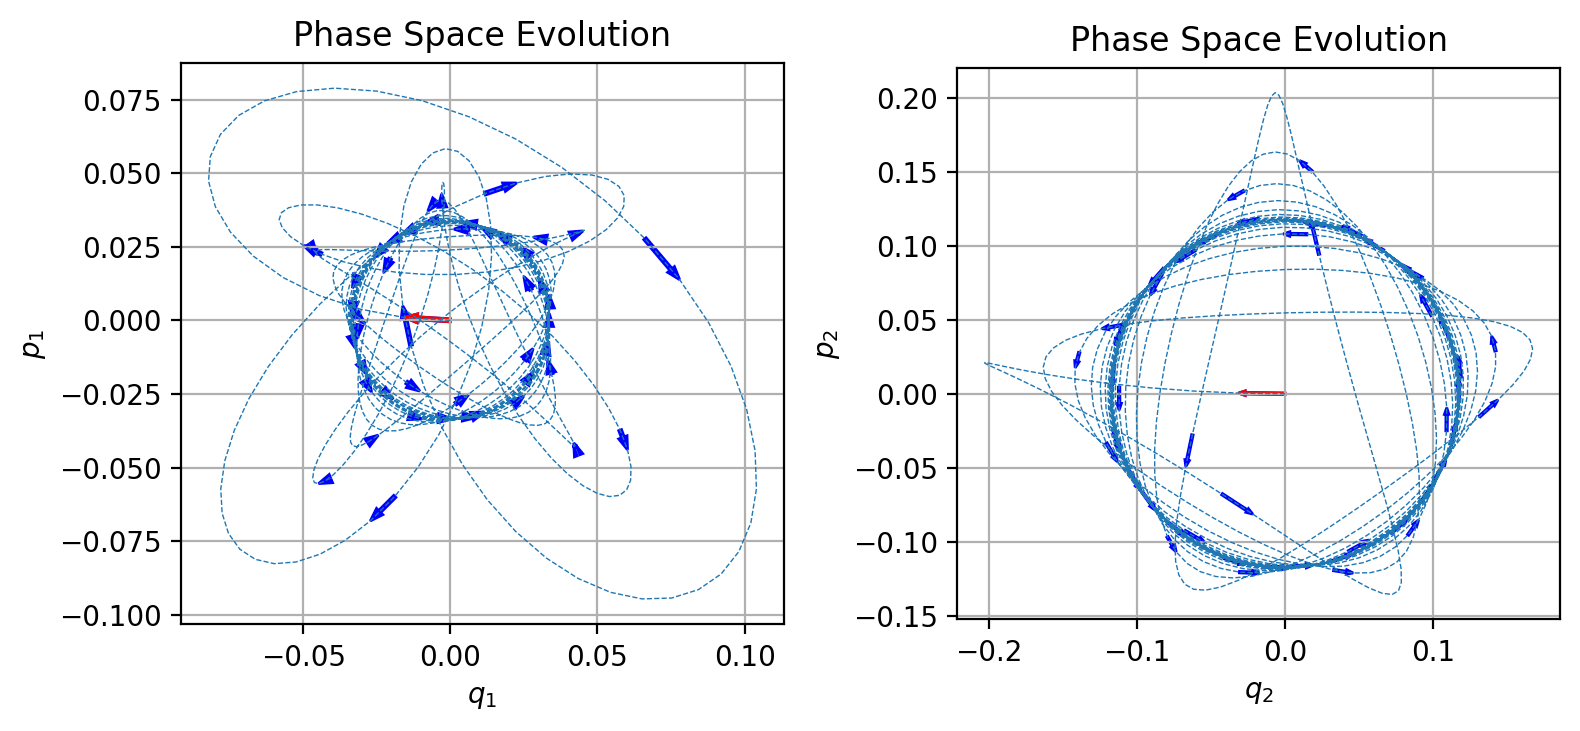

In [264]:
plot_full_evolution_phase_space(X, use_arrows=True)

## Pulsed Drive

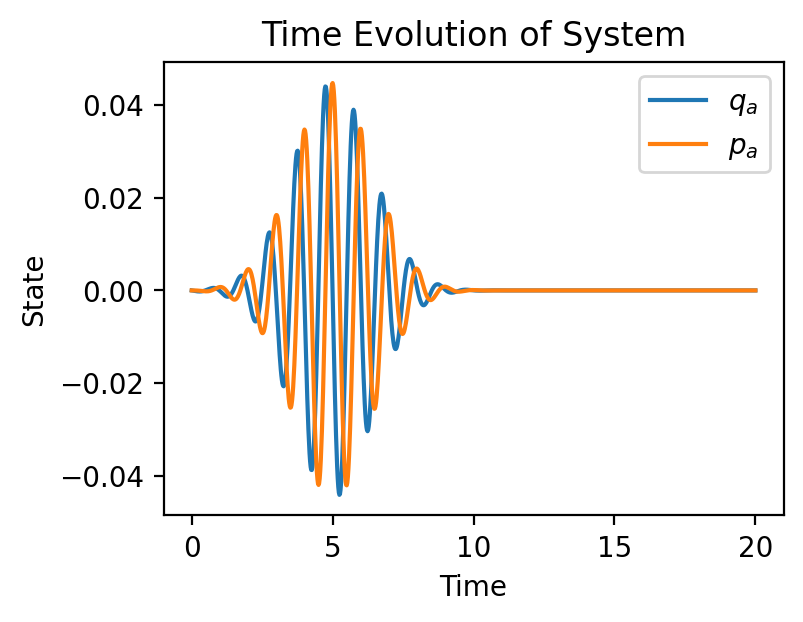

In [145]:
# Single mode system
gaussian_drive_gen = lambda a, w, t0, t: np.exp(1j*w*t) * np.exp(-a*(t-t0)**2) # gaussian envelope + carrier frequency centered at time t0
omega_a = 2*np.pi*1
a = 0.25
t0 = 5

wr = 1
omegas = [2*np.pi*wr]
kappas = [2*np.pi*0.1]
gammas = np.zeros(1)
kerrs = np.zeros(1)
couplings = []

drives = {0:lambda t: 1/np.sqrt(2) * gaussian_drive_gen(a, 2*np.pi*(wr), t0, t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0])
ts = np.linspace(0, 20, 1001)
X = sys.trapezoidal(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

(<Figure size 800x800 with 1 Axes>,
 array([<AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_1$', ylabel='$p_1$'>],
       dtype=object))

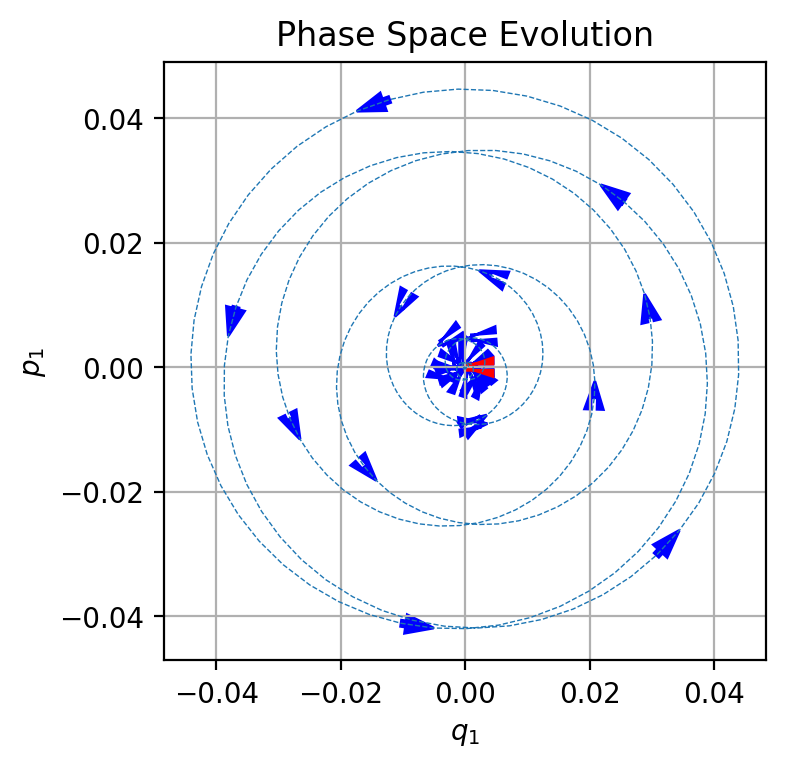

In [146]:
plot_full_evolution_phase_space(X, use_arrows=True)

In [162]:
# Double mode system
wd = 1
a = 0.25
t0 = 5

wr = 1
g = 0.5
omegas = [2*np.pi*wr, 2*np.pi*wr]
kappas = [2*np.pi*0.1, 2*np.pi*0.1]
gammas = np.zeros(2)
kerrs = np.zeros(2)
couplings = [[0,1,2*np.pi*g]]

drives = {0:lambda t: gaussian_drive_gen(a, 2*np.pi*(wd), t0, t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0, 0,0])
ts = np.linspace(0, 20, 1001)
X = sys.trapezoidal(x_0, ts)

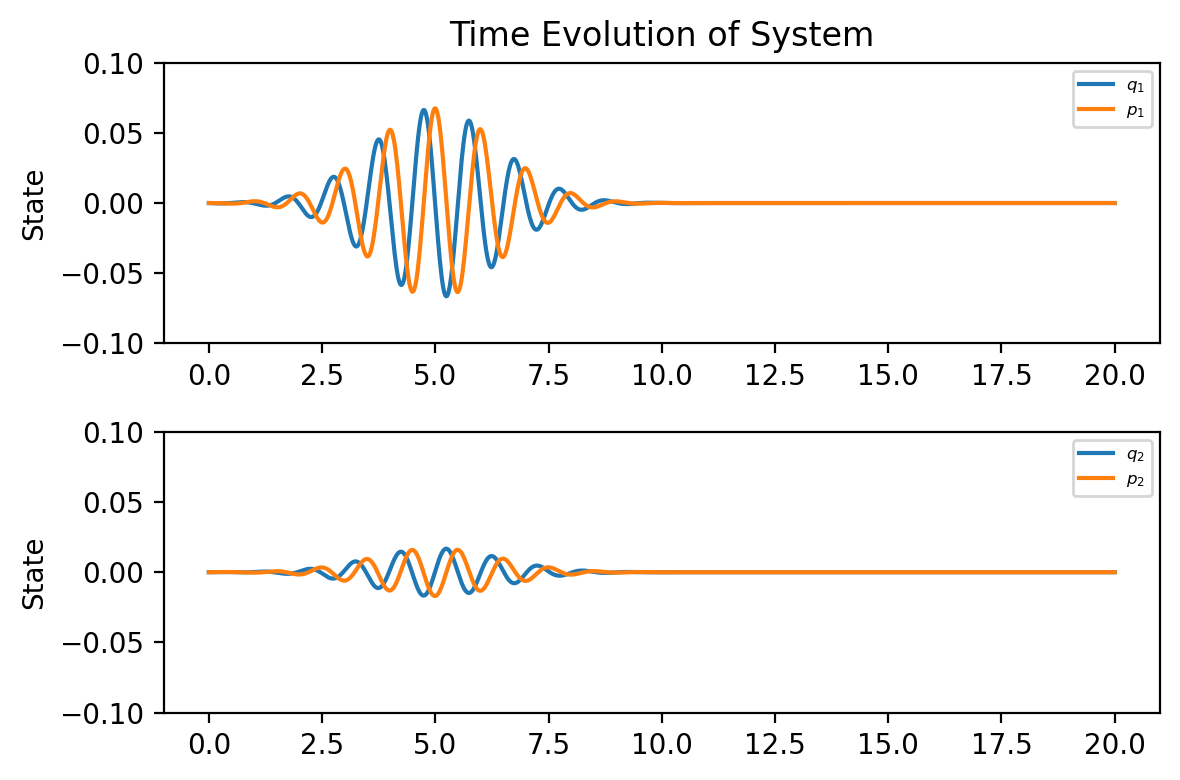

In [163]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1, dpi=200)

ylim = [-0.1,0.1]
i = 0
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[:2], ts, fig=fig, ax=ax, labels=labels)
ax.legend(fontsize=6)
# ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylim(*ylim)

i = 1
ax = axs[i]
labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
plot_full_evolution(X[2:4], ts, fig=fig, ax=ax,labels=labels)
ax.legend(fontsize=6)
ax.set_title(None)
ax.set_xlabel(None)
ax.set_ylim(*ylim)

fig.tight_layout()

(<Figure size 1600x800 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_1$', ylabel='$p_1$'>,
        <AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_2$', ylabel='$p_2$'>],
       dtype=object))

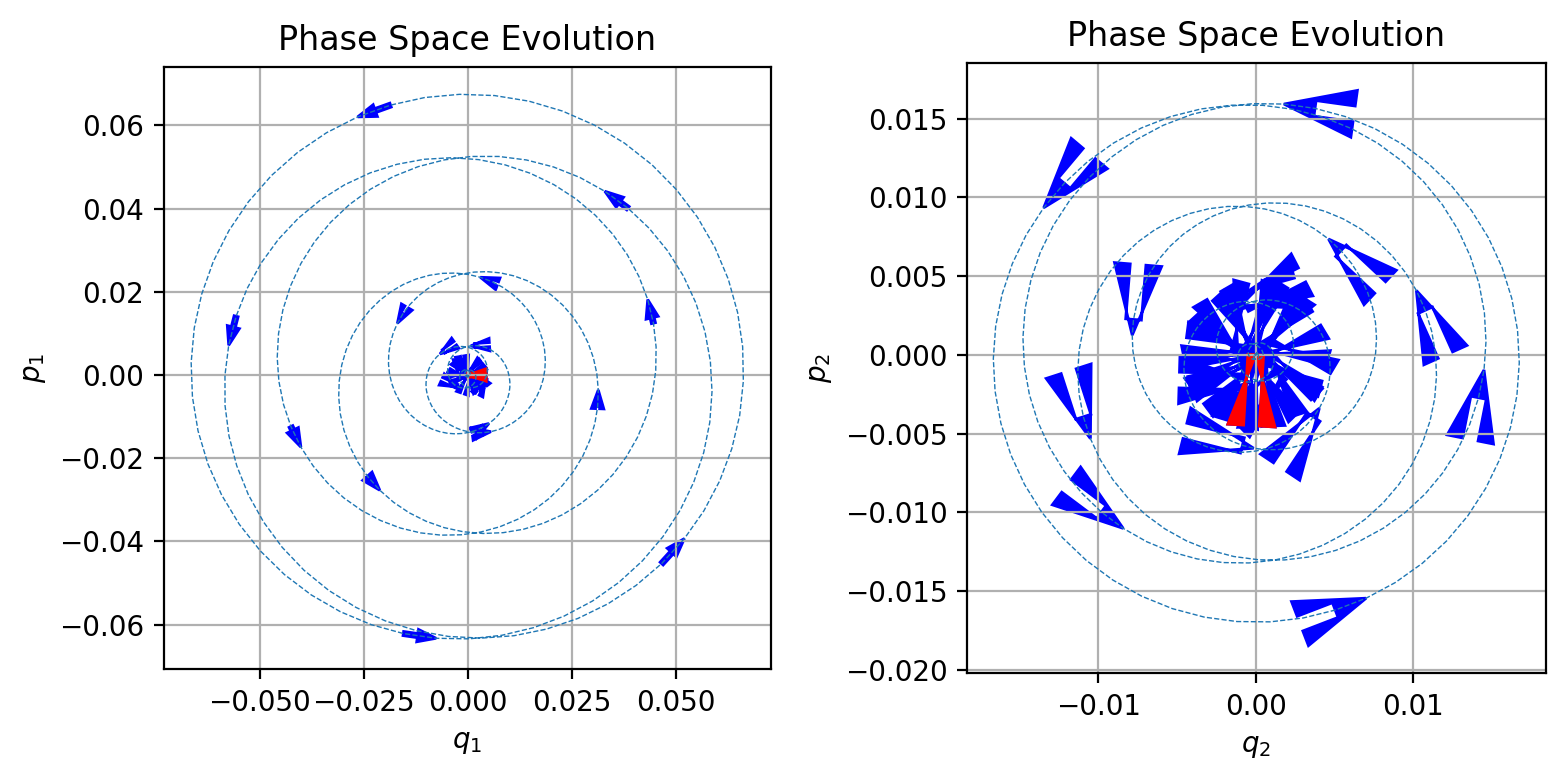

In [164]:
plot_full_evolution_phase_space(X, use_arrows=True)

In [225]:
# N modes
wd = 2
a = 0.25
t0 = 5

N = 4
wr = 1
g = 1
omegas = [2*np.pi*wr]*N
kappas = [2*np.pi*0.1]*N
gammas = np.zeros(N)
kerrs = np.zeros(N)
couplings = []
for i in range(N-1):
    couplings.append([i,i+1,2*np.pi*g])

drives = {0:lambda t: gaussian_drive_gen(a, 2*np.pi*(wd), t0, t)}

sys = MultiModeSystem(params={"omegas":omegas, "kappas":kappas, "gammas":gammas, "kerrs":kerrs, "drives":drives, "couplings":couplings})

x_0 = np.array([0,0]*N)
ts = np.linspace(0, 20, 1001)
X = sys.trapezoidal(x_0, ts)

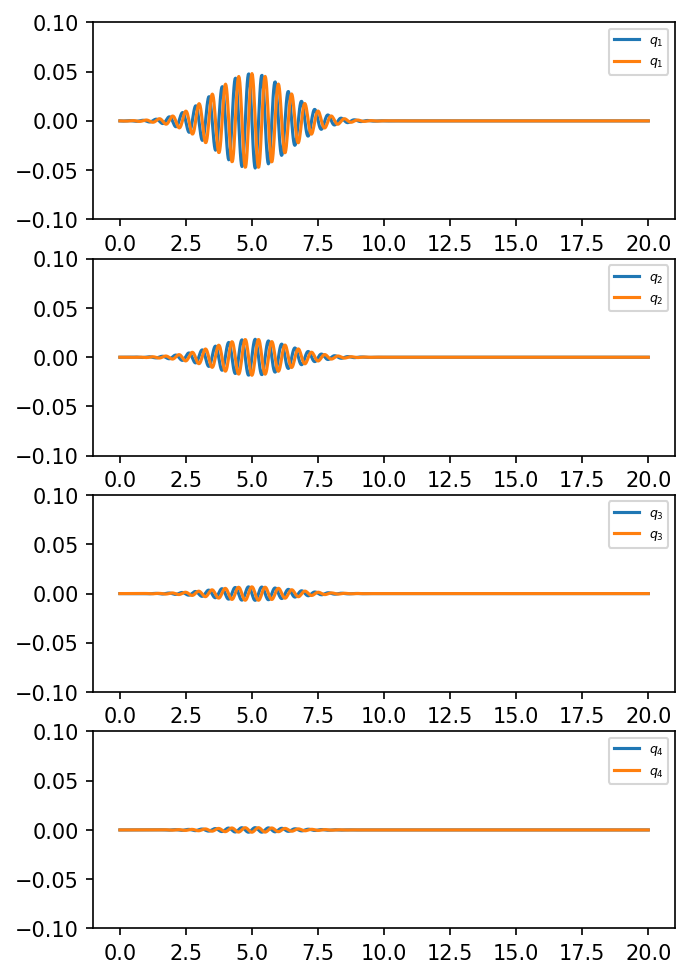

In [226]:
fig, axs = plt.subplots(N,1, figsize=(5,2*N), dpi=150)

ylim = [-0.1,0.1]

for i in range(N):
    ax = axs[i]
    labels = [f"$q_{i+1}$",f"$p_{i+1}$"]
    # plot_full_evolution(X[2*i:2*(i+1)], ts, fig=fig, ax=ax, labels=labels)
    ax.plot(ts, X[2*i,:], label=labels[0])
    ax.plot(ts, X[2*i+1,:], label=labels[0])
    # ax.plot(ts, X[2*i:2*(i+1),:], fig=fig, ax=ax, labels=labels)
    ax.legend(fontsize=6)
    # ax.set_title(None)
    ax.set_xlabel(None)
    ax.set_ylim(*ylim)

(<Figure size 3200x800 with 4 Axes>,
 array([<AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_1$', ylabel='$p_1$'>,
        <AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_2$', ylabel='$p_2$'>,
        <AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_3$', ylabel='$p_3$'>,
        <AxesSubplot:title={'center':'Phase Space Evolution'}, xlabel='$q_4$', ylabel='$p_4$'>],
       dtype=object))

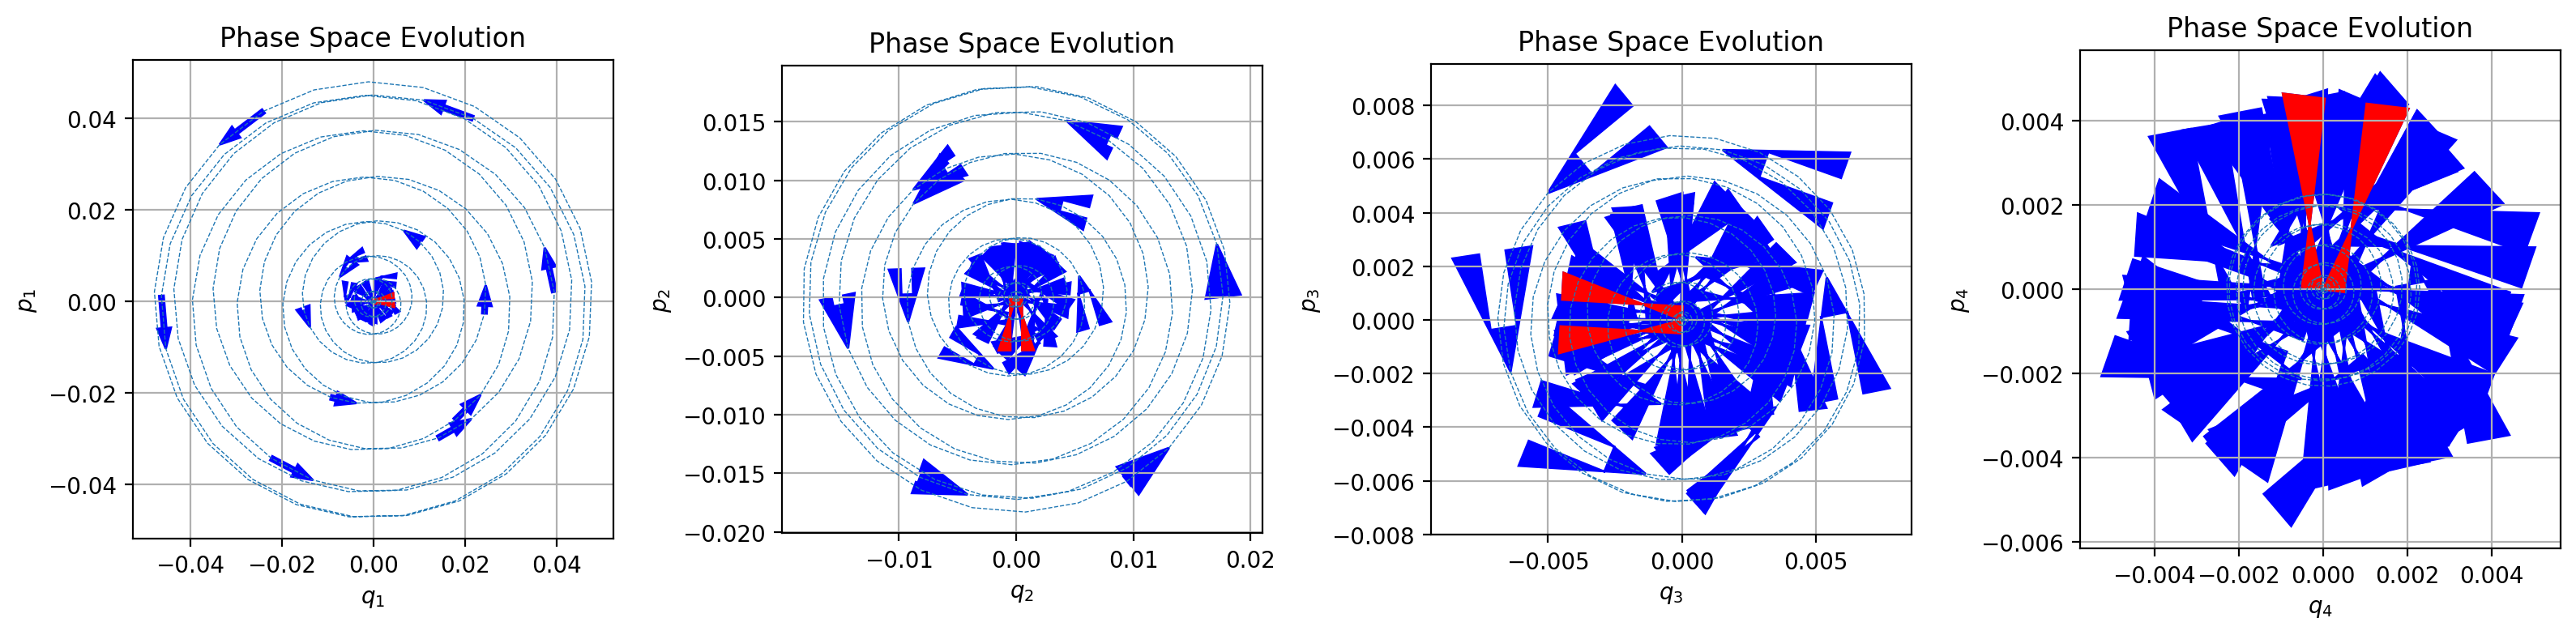

In [227]:
plot_full_evolution_phase_space(X, use_arrows=True)